In [1]:
import os
import pandas as pd
import numpy as np
import pylab as py
import warnings
import matplotlib.pyplot as plt
from  matplotlib import rc
from matplotlib.colors import LogNorm
from matplotlib import font_manager
import matplotlib
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline as spline
matplotlib.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
from matplotlib.ticker import ScalarFormatter,MaxNLocator,LogLocator,NullFormatter,FuncFormatter
warnings.filterwarnings('ignore')
import matplotlib.font_manager
from matplotlib.ticker import MultipleLocator, FormatStrFormatter,AutoMinorLocator
from matplotlib.pyplot import gca
import matplotlib.gridspec as gridspec

In [2]:
# Choose data set
E866 = 1
E772 = 1
E906 = 0
HERMES = 1
ATLAS = 1
RHIC = 1
CMS5 = 1
CMS8 = 0
JLAB = 0
collinear = 0
FULLPLOT = 0
jlab = 1

print('Processing replica data.')

Processing replica data.


In [3]:
pwd = os.getcwd()
path2dat = pwd + '/'
#dfinit = pd.read_csv(path2dat+'collected_results.txt', delim_whitespace=True)
#exception_is = []
#dfinit = dfinit['rep'].tolist()
#dfinit = []
#for i in range(201):
#    if i not in exception_is:
#        dfinit.append(i)
subset_to_exclude = []
dfinit = [i for i in range(101, 296) if i not in subset_to_exclude]

datalst = os.listdir(path2dat+'data_reps/data_rep_000/')
#datalst:original data
jlabdatalst = []

newdatalst = []
#newdatalst:DY files to include
if E866 == 1:
    for address in datalst:
        if ('E866' in address):
            newdatalst.append(address)

if E772 == 1:       
    for address in datalst:
        if ('E772' in address):
            newdatalst.append(address)
            
if E906 == 1:
    for address in datalst:
        if ('E906' in address):
            newdatalst.append(address)            

if HERMES == 1:
    hermesdatalst = os.listdir(path2dat + 'data_reps/data_rep_000/HERMES/')  
    
    
hermesfitlst = []
#hermesdatalst:SIDIS files to include
if HERMES == 1:
    for _fp in hermesdatalst:
        if (('pt1.dat' in _fp) and ('he' not in _fp)):
            hermesfitlst.append(_fp)    

if ATLAS == 1:
    for address in datalst:
        if ('ATLAS' in address):
            newdatalst.append(address)
        
if RHIC == 1:
    for address in datalst:
        if ('RHIC' in address):
            newdatalst.append(address)
            
if CMS5 == 1:
    for address in datalst:
        if ('CMS5' in address):
            newdatalst.append(address)
            
if CMS8 == 1:
    for address in datalst:
        if ('CMS8' in address):
            newdatalst.append(address)

if JLAB == 1:
    for address in datalst:
        if ('Clas' in address):
            jlabdatalst.append(address)

if collinear == 1:
    for address in datalst:
        if ('Clas' in address):
            jlabdatalst.append(address)

print(hermesfitlst)

['pim_xe_pt1.dat', 'pi0_xe_pt1.dat', 'pim_ne_pt1.dat', 'pip_kr_pt1.dat', 'pip_xe_pt1.dat', 'pi0_kr_pt1.dat', 'pip_ne_pt1.dat', 'pim_kr_pt1.dat', 'pi0_ne_pt1.dat']


In [4]:
maxlib = {}
barlib = {}
minlib = {}
hermesmaxlib = {}
hermesbarlib = {}
hermesminlib = {}
#Drell_Yan
for _fp in newdatalst:
    print(_fp)

    maxlib[_fp] = []
    minlib[_fp] = []
    barlib[_fp] = []

    for j in range(len(pd.read_csv(path2dat+'/data_reps/data_rep_000/'+_fp, delim_whitespace=True))):
        df = pd.DataFrame()
        ratio = pd.DataFrame()
        sortedlst = []
        for rep in dfinit:
            rep = int(rep)
            if rep == 0:
                fp0 = path2dat+'/data_reps/data_rep_000/'+_fp
                df = pd.read_csv(fp0, delim_whitespace=True)[j:j+1]
            else:
                if len(str(rep)) == 1:
                    numb = '00'+str(rep)
                elif len(str(rep)) == 2:
                    numb = '0'+str(rep)
                else:
                    numb = str(rep)
                fp1 = path2dat+'/data_reps/data_rep_'+numb+'/'+_fp
                df1 = pd.read_csv(fp1, delim_whitespace=True)[j:j+1]
                df = pd.concat([df,df1])
        if 'E866' in _fp or 'E772' in _fp:
            sortedlst = sorted(df['R_dy'].tolist())
            #print(int(len(sortedlst)/100.*15.))
            #print(int(len(sortedlst)/100.*84.))
            downcutoff = int(len(sortedlst)/100.*15)
            upcutoff = int(len(sortedlst)/100.*84)
            maxlib[_fp].append(sortedlst[upcutoff])
            minlib[_fp].append(sortedlst[downcutoff])
            barlib[_fp].append(df['R_dy'].iloc[0])
        if 'ATLAS' in _fp or 'CMS5' in _fp or 'RHIC' in _fp or 'E906' in _fp or 'CMS8' in _fp:
            sortedlst = sorted((df['FUU']).tolist())
            downcutoff = int(len(sortedlst)/100.*15)
            upcutoff = int(len(sortedlst)/100.*84)
            maxlib[_fp].append(sortedlst[upcutoff])
            minlib[_fp].append(sortedlst[downcutoff])
            barlib[_fp].append(df['FUU'].iloc[0])
            print(sortedlst)

#HERMES
for _fp in hermesfitlst:
    print(_fp)

    maxlib[_fp] = []
    minlib[_fp] = []
    barlib[_fp] = []    

    for j in range(len(pd.read_csv(path2dat+'data_reps/data_rep_000/HERMES/'+_fp, delim_whitespace=True))):
        df = pd.DataFrame()
        ratio = pd.DataFrame()
        sortedlst = []
        for rep in dfinit:
            rep = int(rep)
            if rep == 0:
                fp0 = path2dat+'data_reps/data_rep_000/'+_fp
                df = pd.read_csv(fp0, delim_whitespace=True)[j:j+1]
            else:
                if len(str(rep)) == 1:
                    numb = '00'+str(rep)
                elif len(str(rep)) == 2:
                    numb = '0'+str(rep)
                else:
                    numb = str(rep)
                fp1 = path2dat+'data_reps/data_rep_'+numb+'/HERMES/'+_fp
                df1 = pd.read_csv(fp1, delim_whitespace=True)[j:j+1]
                df = pd.concat([df,df1])
        if 'pi' in _fp:
                ratio = df['fuua']/df['fuu']/df['DIS']
                sortedlst = sorted(ratio.tolist())
                downcutoff = int(len(sortedlst)/100.*15)
                upcutoff = int(len(sortedlst)/100.*84)
                maxlib[_fp].append(sortedlst[upcutoff])
                minlib[_fp].append(sortedlst[downcutoff])
                barlib[_fp].append(ratio.iloc[0]) 
#print(np.round(np.array(sortedlst),2))
#JLAB2022
#JLAB2022

for _fp in ['pi+C_pre1.dat','pi+Fe_pre1.dat','pi+Pb_pre1.dat','pi-C_pre1.dat','pi-Fe_pre1.dat','pi-Pb_pre1.dat']:
    print(_fp)

    maxlib[_fp] = []
    minlib[_fp] = []
    barlib[_fp] = []
    
    for j in range(16):
        df = pd.DataFrame()
        ratio = pd.DataFrame()
        sortedlst = []
        #for each row
        df = pd.DataFrame()
        ratio = pd.DataFrame()
        sortedlst = []
        for rep in dfinit:
            #for each replica
            rep = int(rep)
            if rep != 0:
                if len(str(rep)) == 1:
                    numb = '00'+str(rep)
                elif len(str(rep)) == 2:
                    numb = '0'+str(rep)
                else:
                    numb = str(rep)
                fp1 = path2dat+'/data_reps/data_rep_'+numb+'/JLAB2022/'+_fp
                #fp1 = replica_rep's pi+-_A_pre.dat
                df1 = pd.read_csv(fp1, delim_whitespace=True)[j:j+1]
                df = pd.concat([df,df1])
                #select jth row of replica_rep (each row a different z&pt2)
        ratio = df['fuua']/df['fuu']/df['DIS']
        sortedlst = sorted(ratio.tolist())
        downcutoff = int(len(sortedlst)/100.*15)
        upcutoff = int(len(sortedlst)/100.*84)
        #print(df1)
        maxlib[_fp].append(sortedlst[upcutoff])
        minlib[_fp].append(sortedlst[downcutoff])
        barlib[_fp].append(ratio.iloc[0])

E866_800_Qbin_FeBe.dat
E866_800_Qbin_WBe.dat
E772_800_FeD1.dat
E772_800_WD1.dat
E772_800_CaD1.dat
E772_800_CD1.dat
ATLAS5_Y1.dat
[3515.3066055594354, 3535.326983537768, 3544.4191752041006, 3548.2977792665693, 3561.8833677333096, 3579.684901662623, 3580.8880951378887, 3582.6668295968648, 3589.4139946416567, 3589.9703293337543, 3590.12902414194, 3590.99290161659, 3592.314704789939, 3595.05320488222, 3596.576729886462, 3599.1107180221275, 3601.213315619922, 3601.3882142236816, 3601.700223349687, 3605.426752529704, 3609.352430177617, 3613.170146473772, 3613.326754818952, 3614.631577851185, 3615.610574295172, 3615.810098050043, 3618.900048318324, 3619.079685026594, 3621.0160940147657, 3621.163117432389, 3621.4206672155974, 3621.616852332488, 3623.5311850245807, 3624.4912731846193, 3624.9773372531945, 3625.3396750312895, 3625.3698885736, 3628.8328706871207, 3629.1624058207576, 3629.190378992612, 3630.3775319339743, 3631.2697304055328, 3632.6614911887054, 3634.03308705378, 3634.094081615485, 

In [5]:
fitdatalst =[]
for _fp in newdatalst:
    if ('E866_800_Qbin' in _fp):
        fitdatalst.append(_fp)
    if ('E772' in _fp):
        fitdatalst.append(_fp)
    if ('ATLAS5_Y1' in _fp):
        fitdatalst.append(_fp)
    if ('CMS5' in _fp):
        fitdatalst.append(_fp)
    if ('RHIC' in _fp):
        fitdatalst.append(_fp)

In [6]:
maxrat = {}
minrat = {}
for _fp in hermesfitlst:
    maxrat[_fp] = []
    minrat[_fp] = []
for _fp in fitdatalst:
    maxrat[_fp] = []
    minrat[_fp] = []

In [7]:
print("Done processing data")

Done processing data


In [8]:
### BELOW we have a function for each data set which takes the processed data and plots it for the given axes

In [9]:
print(len(maxlib['pi+C_pre1.dat']))
print(len(maxlib['pi+Fe_pre1.dat']))
print(len(maxlib['pi+Pb_pre1.dat']))
print(len(maxlib['pi-C_pre1.dat']))
print(len(maxlib['pi-C_pre1.dat']))
print(len(maxlib['pi-C_pre1.dat']))

16
16
16
16
16
16


In [10]:
#JLAB2022
# z:0 z=0.35
# z:1 z=0.45
# z:2 z=0.55
# z:3 z=0.65

def JLAB2022_PIP_plot(axes, filename, clr, row,z,lbl,ffmt):
    
    maxx = maxlib[filename][0+4*z:4+4*z]
    minn = minlib[filename][0+4*z:4+4*z]
    
    d0 = np.loadtxt("../AAKTXZ2023/fit/plot_data/JLAB2022/pi+.dat",skiprows=1)[:, :]    
    pt0 = 0.5*(d0[:,3]+d0[:,4]) 
    pt0 = np.sqrt(pt0[0:4])        
    xdata = pt0
    
    #axes.errorbar(xdata, ydata, error, fmt = ffmt,color = clr,label = lbl,capsize = 5)
    axes.step(xdata,maxx, where = 'mid',color = clr,alpha=0.4)
    axes.step(xdata,minn, where = 'mid',color = clr,alpha=0.4)
    axes.fill_between(xdata,maxx,minn, step = 'mid',color = clr,alpha=0.4)
    
def JLAB2022_PIM_plot(axes, filename, clr, row,z,lbl,ffmt):

    j=z
    
    d0 = np.loadtxt("../AAKTXZ2023/fit/plot_data/JLAB2022/pi-.dat",skiprows=1)[:, :]

    pt0 = 0.5*(d0[:,3]+d0[:,4]) 
    pt0 = np.sqrt(pt0[0:4])
    
    maxx = maxlib[filename][0+4*z:4+4*z]
    minn = minlib[filename][0+4*z:4+4*z]
        
    xdata = pt0
    
    #axes.errorbar(xdata, ydata, error, fmt = ffmt,color = clr,label = lbl,capsize = 5)
    axes.step(xdata,maxx, where = 'mid',color = clr,alpha=0.4)
    axes.step(xdata,minn, where = 'mid',color = clr,alpha=0.4)
    axes.fill_between(xdata,maxx,minn, step = 'mid',color = clr,alpha=0.4)

def JLAB2022_PIP_data(axes,z):    

    j=z
    
    d0 = np.loadtxt("../AAKTXZ2023/fit/plot_data/JLAB2022/pi+.dat",skiprows=1)[:, :]

    pt0 = 0.5*(d0[:,3]+d0[:,4]) 
    pt0 = np.sqrt(pt0[0:4])

    pt0 = 0.5*(d0[:,3]+d0[:,4]) 
    pt0 = np.sqrt(pt0[0:4])

    c00 = d0[:,5]
    dc00 = d0[:,14]
    fe00 = d0[:,8]
    dfe00 = d0[:,15]
    pb00 = d0[:,11]
    dpb00 = d0[:,16]

    c0=np.empty(4, dtype=object)
    dc0=np.empty(4, dtype=object)
    fe0=np.empty(4, dtype=object)
    dfe0=np.empty(4, dtype=object)
    pb0=np.empty(4, dtype=object)
    dpb0=np.empty(4, dtype=object)

    for i in range(4):
        c0[i]=c00[0+8*i:4+8*i]
        dc0[i]=dc00[0+8*i:4+8*i]
        fe0[i]=fe00[0+8*i:4+8*i] 
        dfe0[i]=dfe00[0+8*i:4+8*i]
        pb0[i]=pb00[0+8*i:4+8*i]
        dpb0[i]=dpb00[0+8*i:4+8*i]

    c0p=np.empty(4, dtype=object)
    dc0p=np.empty(4, dtype=object)
    fe0p=np.empty(4, dtype=object)
    dfe0p=np.empty(4, dtype=object)
    pb0p=np.empty(4, dtype=object)
    dpb0p=np.empty(4, dtype=object)

    rang = [0,1,2,3]

    for i in range(4):    
        c0p[i]=c0[i][0:rang[i]]
        dc0p[i]=dc0[i][0:rang[i]]
        fe0p[i]=fe0[i][0:rang[i]]
        dfe0p[i]=dfe0[i][0:rang[i]]
        pb0p[i]=pb0[i][0:rang[i]]
        dpb0p[i]=dpb0[i][0:rang[i]]
        
    p=np.empty(4, dtype=object)

    p[0] = np.array([]) 
    p[1] = pt0[0:1]
    p[2] = pt0[0:2]
    p[3] = pt0[0:3]

    axes.errorbar(pt0,c0[j],yerr=dc0[j],fmt = "o", mfc='none',color = 'blue', linewidth = 1,capsize = 5, capthick =0.8, barsabove = False)
    axes.errorbar(pt0,fe0[j],yerr=dfe0[j],fmt = "o", mfc='none',color = 'red', linewidth = 1,capsize = 5, capthick =0.8, barsabove = False)
    axes.errorbar(pt0,pb0[j],yerr=dpb0[j],fmt = "o", mfc='none',color = 'black', linewidth = 1,capsize = 5, capthick =0.8, barsabove = False)
    
    axes.errorbar(p[j],c0p[j],yerr=dc0p[j],fmt = "o", color = 'blue', label = '${\mathrm{JLAB-C}}$',linewidth = 1,capsize = 5, capthick =0.8, barsabove = False)
    axes.errorbar(p[j],fe0p[j],yerr=dfe0p[j],fmt = "o", color = 'red', label = '${\mathrm{JLAB-Fe}}$',linewidth = 1,capsize = 5, capthick =0.8, barsabove = False)
    axes.errorbar(p[j],pb0p[j],yerr=dpb0p[j],fmt = "o", color = 'black', label = '${\mathrm{JLAB-Pb}}$',linewidth = 1,capsize = 5, capthick =0.8, barsabove = False)
    
def JLAB2022_PIM_data(axes,z):

    j=z
    
    d0 = np.loadtxt("../AAKTXZ2023/fit/plot_data/JLAB2022/pi-.dat",skiprows=1)[:, :]

    pt0 = 0.5*(d0[:,3]+d0[:,4]) 
    pt0 = np.sqrt(pt0[0:4])

    c00 = d0[:,5]
    dc00 = d0[:,14]
    fe00 = d0[:,8]
    dfe00 = d0[:,15]
    pb00 = d0[:,11]
    dpb00 = d0[:,16]

    c0=np.empty(4, dtype=object)
    dc0=np.empty(4, dtype=object)
    fe0=np.empty(4, dtype=object)
    dfe0=np.empty(4, dtype=object)
    pb0=np.empty(4, dtype=object)
    dpb0=np.empty(4, dtype=object)

    for i in range(4):
        c0[i]=c00[0+8*i:4+8*i]
        dc0[i]=dc00[0+8*i:4+8*i]
        fe0[i]=fe00[0+8*i:4+8*i] 
        dfe0[i]=dfe00[0+8*i:4+8*i]
        pb0[i]=pb00[0+8*i:4+8*i]
        dpb0[i]=dpb00[0+8*i:4+8*i]

    c0p=np.empty(4, dtype=object)
    dc0p=np.empty(4, dtype=object)
    fe0p=np.empty(4, dtype=object)
    dfe0p=np.empty(4, dtype=object)
    pb0p=np.empty(4, dtype=object)
    dpb0p=np.empty(4, dtype=object)

    rang = [0,1,2,3]

    for i in range(4):    
        c0p[i]=c0[i][0:rang[i]]
        dc0p[i]=dc0[i][0:rang[i]]
        fe0p[i]=fe0[i][0:rang[i]]
        dfe0p[i]=dfe0[i][0:rang[i]]
        pb0p[i]=pb0[i][0:rang[i]]
        dpb0p[i]=dpb0[i][0:rang[i]]
        
    p=np.empty(4, dtype=object)

    p[0] = np.array([]) 
    p[1] = pt0[0:1]
    p[2] = pt0[0:2]
    p[3] = pt0[0:3]
    
    axes.errorbar(pt0,c0[j],yerr=dc0[j],fmt = "o", mfc='none',color = 'blue', linewidth = 1,capsize = 5, capthick =0.8, barsabove = False)
    axes.errorbar(pt0,fe0[j],yerr=dfe0[j],fmt = "o", mfc='none',color = 'red', linewidth = 1,capsize = 5, capthick =0.8, barsabove = False)
    axes.errorbar(pt0,pb0[j],yerr=dpb0[j],fmt = "o", mfc='none',color = 'black', linewidth = 1,capsize = 5, capthick =0.8, barsabove = False)
    
    axes.errorbar(p[j],c0p[j],yerr=dc0p[j],fmt = "o", color = 'blue', label = '${\mathrm{JLAB_C}}$',linewidth = 1,capsize = 5, capthick =0.8, barsabove = False)
    axes.errorbar(p[j],fe0p[j],yerr=dfe0p[j],fmt = "o", color = 'red', label = '${\mathrm{JLAB_Fe}}$',linewidth = 1,capsize = 5, capthick =0.8, barsabove = False)
    axes.errorbar(p[j],pb0p[j],yerr=dpb0p[j],fmt = "o", color = 'black', label = '${\mathrm{JLAB_Pb}}$',linewidth = 1,capsize = 5, capthick =0.8, barsabove = False) 

In [11]:
def HERMES_plot(axes, filename, clr, row, kinematics, lbl,ffmt):
    path2dat = pwd+'/data_reps/data_rep_000/HERMES/'
    if(kinematics   == 'Nu'): 
        filenames = filename + '_nu.dat'
    elif(kinematics == 'Z'):
        filenames = filename + '_z.dat'
    elif(kinematics == 'q2'):
        filenames = filename + '_q2.dat'
    elif(kinematics == 'pt2'):
        filenames = filename + '_pt1.dat'
    if (filename != 'pip_kr_pt1.dat'):
            file = (pd.read_csv(path2dat + filenames, sep ='\s+'))
            maxx = maxlib[filenames]
            minn = minlib[filenames]
            ydata = file['MULT-RATIO']
            error = np.sqrt((file['STAT'])**2+ (file['SYS'])**2)
            if(kinematics == 'pt2'):
                xdata = np.sqrt(file[kinematics])
            else:
                xdata = file[kinematics]
            axes.step(xdata,maxx, where = 'mid',color = clr,alpha=0.4)
            axes.step(xdata,minn, where = 'mid',color = clr,alpha=0.4)
            axes.fill_between(xdata,maxx,minn, step = 'mid',color = clr,alpha=0.4)
            
            ## path to collinear uncertainty
            if(collinear == 1):
                path2dat2 = pwd+'/data_reps_col/data_rep_000/HERMES/'
                maxx = maxrat[filenames]
                minn = minrat[filenames]
                #axes.step(xdata,maxx, where = 'mid',color = clr,alpha=0.2)
                #axes.step(xdata,minn, where = 'mid',color = clr,alpha=0.2)
                axes.fill_between(xdata,maxx,minn, step = 'mid',color = clr,alpha=0.2)

def HERMES_data():
    pip_ne_pt2 = pd.read_csv('data_reps/data_rep_000/HERMES/pip_ne_pt1.dat', sep ='\s+' ).to_numpy()
    pip_kr_pt2 = pd.read_csv('data_reps/data_rep_000/HERMES/pip_kr_pt1.dat', sep ='\s+').to_numpy()
    pip_xe_pt2 = pd.read_csv('data_reps/data_rep_000/HERMES/pip_xe_pt1.dat', sep ='\s+').to_numpy()

    pim_ne_pt2 = pd.read_csv('data_reps/data_rep_000/HERMES/pim_ne_pt1.dat', sep ='\s+').to_numpy()
    pim_kr_pt2 = pd.read_csv('data_reps/data_rep_000/HERMES/pim_kr_pt1.dat', sep ='\s+').to_numpy()
    pim_xe_pt2 = pd.read_csv('data_reps/data_rep_000/HERMES/pim_xe_pt1.dat', sep ='\s+').to_numpy()

    pi0_ne_pt2 = pd.read_csv('data_reps/data_rep_000/HERMES/pi0_ne_pt1.dat', sep ='\s+').to_numpy()
    pi0_kr_pt2 = pd.read_csv('data_reps/data_rep_000/HERMES/pi0_kr_pt1.dat', sep ='\s+').to_numpy()
    pi0_xe_pt2 = pd.read_csv('data_reps/data_rep_000/HERMES/pi0_xe_pt1.dat', sep ='\s+').to_numpy()

    ax00.errorbar(np.sqrt(pip_ne_pt2[:,3]),pip_ne_pt2[:,4], np.sqrt(pip_ne_pt2[:,5]**2+pip_ne_pt2[:,6]**2), fmt = "o",mfc='none',color = 'black', ecolor = 'black', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
    ax00.errorbar(np.sqrt(pip_kr_pt2[:,3]),pip_kr_pt2[:,4], np.sqrt(pip_kr_pt2[:,5]**2+pip_kr_pt2[:,6]**2), fmt = "o",mfc='none',color = 'green', ecolor = 'green', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
    ax00.errorbar(np.sqrt(pip_xe_pt2[:,3]),pip_xe_pt2[:,4], np.sqrt(pip_xe_pt2[:,5]**2+pip_xe_pt2[:,6]**2), fmt = "o",mfc='none',color = 'blue', ecolor = 'blue', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)

    ax01.errorbar(np.sqrt(pi0_ne_pt2[:,3]),pi0_ne_pt2[:,4], np.sqrt(pi0_ne_pt2[:,5]**2+pi0_ne_pt2[:,6]**2), fmt = "o",mfc='none',color = 'black', ecolor = 'black', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
    ax01.errorbar(np.sqrt(pi0_kr_pt2[:,3]),pi0_kr_pt2[:,4], np.sqrt(pi0_kr_pt2[:,5]**2+pi0_kr_pt2[:,6]**2), fmt = "o",mfc='none',color = 'green', ecolor = 'green', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
    ax01.errorbar(np.sqrt(pi0_xe_pt2[:,3]),pi0_xe_pt2[:,4], np.sqrt(pi0_xe_pt2[:,5]**2+pi0_xe_pt2[:,6]**2), fmt = "o",mfc='none',color = 'blue', ecolor = 'blue', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)

    ax02.errorbar(np.sqrt(pim_ne_pt2[:,3]),pim_ne_pt2[:,4], np.sqrt(pim_ne_pt2[:,5]**2+pim_ne_pt2[:,6]**2), fmt = "o",mfc='none',color = 'black', ecolor = 'black', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False )
    ax02.errorbar(np.sqrt(pim_kr_pt2[:,3]),pim_kr_pt2[:,4], np.sqrt(pim_kr_pt2[:,5]**2+pim_kr_pt2[:,6]**2), fmt = "o",mfc='none',color = 'green', ecolor = 'green', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
    ax02.errorbar(np.sqrt(pim_xe_pt2[:,3]),pim_xe_pt2[:,4], np.sqrt(pim_xe_pt2[:,5]**2+pim_xe_pt2[:,6]**2), fmt = "o",mfc='none',color = 'blue', ecolor = 'blue', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)

    
    ax00.errorbar(np.sqrt(pip_ne_pt2[:,3][0:2]),pip_ne_pt2[:,4][0:2], np.sqrt(pip_ne_pt2[:,5][0:2]**2+pip_ne_pt2[:,6][0:2]**2), fmt = "o",color = 'black', ecolor = 'black', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
    ax00.errorbar(np.sqrt(pip_kr_pt2[:,3][0:2]),pip_kr_pt2[:,4][0:2], np.sqrt(pip_kr_pt2[:,5][0:2]**2+pip_kr_pt2[:,6][0:2]**2), fmt = "o",color = 'green', ecolor = 'green', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
    ax00.errorbar(np.sqrt(pip_xe_pt2[:,3][0:2]),pip_xe_pt2[:,4][0:2], np.sqrt(pip_xe_pt2[:,5][0:2]**2+pip_xe_pt2[:,6][0:2]**2), fmt = "o",color = 'blue', ecolor = 'blue', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)

    ax01.errorbar(np.sqrt(pi0_ne_pt2[:,3][0:2]),pi0_ne_pt2[:,4][0:2], np.sqrt(pi0_ne_pt2[:,5][0:2]**2+pi0_ne_pt2[:,6][0:2]**2), fmt = "o",color = 'black', ecolor = 'black', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
    ax01.errorbar(np.sqrt(pi0_kr_pt2[:,3][0:2]),pi0_kr_pt2[:,4][0:2], np.sqrt(pi0_kr_pt2[:,5][0:2]**2+pi0_kr_pt2[:,6][0:2]**2), fmt = "o",color = 'green', ecolor = 'green', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
    ax01.errorbar(np.sqrt(pi0_xe_pt2[:,3][0:2]),pi0_xe_pt2[:,4][0:2], np.sqrt(pi0_xe_pt2[:,5][0:2]**2+pi0_xe_pt2[:,6][0:2]**2), fmt = "o",color = 'blue', ecolor = 'blue', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)

    ax02.errorbar(np.sqrt(pim_ne_pt2[:,3][0:2]),pim_ne_pt2[:,4][0:2], np.sqrt(pim_ne_pt2[:,5][0:2]**2+pim_ne_pt2[:,6][0:2]**2), fmt = "o",color = 'black', ecolor = 'black', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False, label = r'\rm HERMES-Ne')
    ax02.errorbar(np.sqrt(pim_kr_pt2[:,3][0:2]),pim_kr_pt2[:,4][0:2], np.sqrt(pim_kr_pt2[:,5][0:2]**2+pim_kr_pt2[:,6][0:2]**2), fmt = "o",color = 'green', ecolor = 'green', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,  label = r'\rm HERMES-Kr')
    ax02.errorbar(np.sqrt(pim_xe_pt2[:,3][0:2]),pim_xe_pt2[:,4][0:2], np.sqrt(pim_xe_pt2[:,5][0:2]**2+pim_xe_pt2[:,6][0:2]**2), fmt = "o",color = 'blue', ecolor = 'blue', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,  label = r'\rm HERMES-Xe')

In [12]:
def E772_plot(axes, filename,clr, lbl,ffmt, factor):
        path2dat = pwd+'/data_reps/data_rep_000/'
        
        maxx = maxlib[filename]
        minn = minlib[filename]
        
        file = (pd.read_csv(path2dat + filename, sep ='\s+'))
        xdata = file['pt']
        ydata = file['DY-RATIO']
        error = file['error']
        
        ydat = factor*ydata
        maxxx = factor*np.array(maxx)
        minnn = factor*np.array(minn)
        error = factor*np.array(error)
        
        axes.errorbar(xdata, ydat, error, fmt = ffmt,color = clr, label = lbl,capsize = 5,mfc='white')
        axes.step(xdata,maxxx, where = 'mid',color = clr,alpha=0.4)
        axes.step(xdata,minnn, where = 'mid',color = clr,alpha=0.4)
        axes.fill_between(xdata,maxxx,minnn, step = 'mid',color = clr,alpha=0.4)
        
        
        ## path to collinear uncertainty
        if(collinear == 1):
            path2dat2 = pwd+'/data_reps_col/data_rep_000/'
            maxx = maxrat[filename]
            minn = minrat[filename]
            
            maxxc = factor*np.array(maxx)
            minnc = factor*np.array(minn)
            #axes.step(xdata,maxx, where = 'mid',color = clr,alpha=0.2)
            #axes.step(xdata,minn, where = 'mid',color = clr,alpha=0.2)
            axes.fill_between(xdata,maxxc,minnc, step = 'mid',color = clr,alpha=0.2)

In [13]:
def E866_plot(axes, filename, clr,lbl,factor,bin,ffmt):
    path2dat = pwd+'/data_reps/data_rep_000/'
    file = (pd.read_csv(path2dat + filename, sep ='\s+'))

    maxx = maxlib[filename]
    minn = minlib[filename]
    
    ## path to collinear uncertainty
    path2dat2 = pwd+'/data_reps_col/data_rep_000/'
    

    xbin1 = file['pt'][0:3]
    xbin2 = file['pt'][3:6]
    xbin3 = file['pt'][6:10]
    xbin4 = file['pt'][10:14]
    
    ybin1 = file['DY-RATIO'][0:3]
    ybin2 = file['DY-RATIO'][3:6]
    ybin3 = file['DY-RATIO'][6:10]
    ybin4 = file['DY-RATIO'][10:14]
    
    error1 = file['error'][0:3]
    error2 = file['error'][3:6]
    error3 = file['error'][6:10]
    error4 = file['error'][10:14]

    maxx1 = np.array(maxx[0:3])
    maxx2 = np.array(maxx[3:6])
    maxx3 = np.array(maxx[6:10])
    maxx4 = np.array(maxx[10:14])


    minn1 = np.array(minn[0:3])
    minn2 = np.array(minn[3:6])
    minn3 = np.array(minn[6:10])
    minn4 = np.array(minn[10:14])
    
    
    if(collinear ==1):
        maxxc = maxrat[filename]
        minnc = minrat[filename]
    
        maxxc1 = np.array(maxxc[0:3])
        maxxc2 = np.array(maxxc[3:6])
        maxxc3 = np.array(maxxc[6:10])
        maxxc4 = np.array(maxxc[10:14])
    
        minnc1 = np.array(minnc[0:3])
        minnc2 = np.array(minnc[3:6])
        minnc3 = np.array(minnc[6:10])
        minnc4 = np.array(minnc[10:14])
    
    
    
    if(bin == 1):
        xbin = xbin1
        ybin = factor*ybin1
        error = factor*error1
        maxxx = factor*maxx1
        minnn = factor*minn1
        if(collinear ==1):
            maxxxc = factor*maxxc1
            minnnc = factor*minnc1
    elif(bin == 2):
        xbin = xbin2
        ybin = factor*ybin2
        error = factor*error2
        maxxx = factor*maxx2
        minnn = factor*minn2
        if(collinear ==1):
            maxxxc = factor*maxxc2
            minnnc = factor*minnc2
    elif(bin == 3):
        xbin = xbin3
        ybin = factor*ybin3
        error = factor*error3
        maxxx = factor*maxx3
        minnn = factor*minn3
        if(collinear ==1):
            maxxxc = factor*maxxc3
            minnnc = factor*minnc3
    elif(bin == 4):
        xbin = xbin4
        ybin = factor*ybin4
        error = factor*error4
        maxxx = factor*maxx4
        minnn = factor*minn4
        if(collinear ==1):
            maxxxc = factor*maxxc4
            minnnc = factor*minnc4
    axes.errorbar(xbin, ybin, error, fmt = ffmt,color = clr,label = lbl,capsize = 5)
    axes.step(xbin,maxxx, where = 'mid',color = clr,alpha=0.4)
    axes.step(xbin,minnn, where = 'mid',color = clr,alpha=0.4)
    axes.fill_between(xbin,maxxx,minnn, step = 'mid',color = clr,alpha=0.4)
    
    if(collinear == 1):
        #collinear
        #axes.step(xbin,maxxxc, where = 'mid',color = clr,alpha=0.2)
        #axes.step(xbin,minnnc, where = 'mid',color = clr,alpha=0.2
        axes.fill_between(xbin,maxxxc,minnnc, step = 'mid',color = clr,alpha=0.2)

In [14]:
def CMS5_plot(axes,filename,clr,lbl,ffmt):   
    path2dat = pwd+'/data_reps/data_rep_000/'   
    maxx = []
    minn = []
    for i in range(len(maxlib[filename])):
            maxx.append(maxlib[filename][i]/1000.)
            minn.append(minlib[filename][i]/1000.)    
    file = (pd.read_csv(path2dat + filename, sep ='\s+'))
    xdata = file['pt']
    ydata = file['CX']
    error = file['ERR']
    
    axes.step(xdata,maxx, where = 'mid',color = clr,alpha=0.4)
    axes.step(xdata,minn, where = 'mid',color = clr,alpha=0.4)
    axes.fill_between(xdata,maxx,minn, step = 'mid',color = clr,alpha=0.4)
    
    if(collinear ==1):
        #collinear uncertainty
        #axes.step(xdata,maxxc, where = 'mid',color = clr,alpha=0.2)
        #axes.step(xdata,minnc, where = 'mid',color = clr,alpha=0.2)
        maxxc = []
        minnc = []
        for i in range(len(maxrat[filename])):
            maxxc.append(maxrat[filename][i]/1000.)
            minnc.append(minrat[filename][i]/1000.)    
        axes.fill_between(xdata,maxxc,minnc, step = 'mid',color = clr,alpha=0.2)
    
    # data
    axes.errorbar(xdata, ydata/1000., error/1000, fmt = ffmt,color = clr, ecolor = clr, label = lbl,capsize = 5)

    axes.semilogy()


In [15]:
def RHIC_plot(axes, filename,clr, lbl,factor,ffmt):
        path2dat = pwd+'/data_reps/data_rep_000/'
        
        maxx = np.array(maxlib[filename])
        minn = np.array(minlib[filename])
        
        if(collinear ==1):
            maxxc = np.array(maxrat[filename])
            minnc = np.array(minrat[filename])
        
        file = (pd.read_csv(path2dat + filename, sep ='\s+'))
        xdata = file['pt']
        ydata = file['CX']
        error = file['ERR']
        ydata = np.array(ydata)
        error = np.array(error)
        
        axes.step(xdata,factor*maxx, where = 'mid',color = clr,alpha=0.4)
        axes.step(xdata,factor*minn, where = 'mid',color = clr,alpha=0.4)
        axes.fill_between(xdata,factor*maxx,factor*minn, step = 'mid',color = clr,alpha=0.4)
        #axes.semilogy()
        
        if(collinear == 1):
            #collinear uncertainty
            #axes.step(xdata,factor*maxxc, where = 'mid',color = clr,alpha=0.2)
            #axes.step(xdata,factor*minnc, where = 'mid',color = clr,alpha=0.2)
            axes.fill_between(xdata,factor*maxxc,factor*minnc, step = 'mid',color = clr,alpha=0.2)
        
        #data
        axes.errorbar(xdata, factor*ydata, factor*error, fmt = ffmt,color= clr, label = lbl,capsize = 5)



In [16]:
def ATLAS5_plot(axes,filename_bin,clr,lbl,ffmt):  
    filename0 = "ATLAS5_Y1.dat"
    filename = "ATLAS5_Y2.dat"
    filename2 = "ATLAS5_Y3.dat"
    path2dat = pwd+'/data_reps/data_rep_000/'
    maxx0 = []
    minn0 = []
    for i in range(len(maxlib[filename0])):
            maxx0.append(maxlib[filename0][i]/1000.)
            minn0.append(minlib[filename0][i]/1000.) 
    file0 = (pd.read_csv(path2dat + filename0, sep ='\s+'))
    xdata0 = file0['pt']
    ydata0 = file0['CX']
    error0 = file0['ERR']

    
    if(filename_bin == "ATLAS5_Y1.dat"):
        axes.errorbar(xdata0, xdata0*ydata0/1000.,xdata0*error0/1000.,fmt = ffmt, color = clr, label = lbl,capsize = 5)
        axes.step(xdata0,xdata0*maxx0, where = 'mid',color = clr,alpha=0.4,label="_nolegend_")
        axes.step(xdata0,xdata0*minn0, where = 'mid',color = clr,alpha=0.4,label="_nolegend_")
        axes.fill_between(xdata0,xdata0*maxx0,xdata0*minn0, step = 'mid',color = clr,alpha=0.2,label="_nolegend_")
        
        if(collinear==1):
            #collinear
            #axes.step(xdata,xdata*maxxc[:4], where = 'mid',color = clr,alpha=0.2,label="_nolegend_")
            #axes.step(xdata,xdata*minnc[:4], where = 'mid',color = clr,alpha=0.2,label="_nolegend_")
            maxxc0 = []
            minnc0 = []
            for i in range(len(maxrat[filename0])):
                maxxc0.append(maxrat[filename0][i]/1000.)
                minnc0.append(minrat[filename0][i]/1000.)  
            axes.fill_between(xdata0,xdata0*maxxc0,xdata0*minnc0, step = 'mid',color = clr,alpha=0.2,label="_nolegend_")
        
        #data
        #axes.errorbar(xdata0, xdata0*ydata0/1000. ,xdata0*error0/1000. ,fmt = "o",color = clr, label = lbl,capsize = 5)

        
    axes.semilogy()

In [17]:
def ATLAS5_2_plot(axes,filename_bin,clr,lbl,ffmt):  
    filename0 = "ATLAS5_Y1.dat"
    filename = "ATLAS5_Y2.dat"
    filename2 = "ATLAS5_Y3.dat"
    path2dat = pwd+'/data_reps/data_rep_000/'
    maxx0 = []
    minn0 = []
    maxx = []
    minn = []
    maxx2 = []
    minn2 = []
    for i in range(len(maxlib[filename0])):
            maxx0.append(maxlib[filename0][i]/1000.)
            minn0.append(minlib[filename0][i]/1000.)
    for i in range(len(maxlib[filename])):
            maxx.append(maxlib[filename][i]/3000.)
            minn.append(minlib[filename][i]/3000.)
            
    for i in range(len(maxlib[filename2])):
            maxx2.append(maxlib[filename2][i]/1000.)
            minn2.append(minlib[filename2][i]/1000.) 
    maxxc0 = []
    minnc0 = []
    maxxc = []
    minnc = []
    maxxc2 = []
    minnc2 = []
    if(collinear ==1):
        for i in range(len(maxrat[filename0])):
                maxxc0.append(maxrat[filename0][i]/1000.)
                minnc0.append(minrat[filename0][i]/1000.)  
        for i in range(len(maxrat[filename])):
                maxxc.append(maxrat[filename][i]/3000.)
                minnc.append(minrat[filename][i]/3000.)     
        for i in range(len(maxrat[filename2])):
                maxxc2.append(maxrat[filename2][i]/1000.)
                minnc2.append(minrat[filename2][i]/1000.) 
        file0 = (pd.read_csv(path2dat + filename0, sep ='\s+'))
        xdata0 = file0['pt']
        ydata0 = file0['CX']
        error0 = file0['ERR']             
        file = (pd.read_csv(path2dat + filename, sep ='\s+'))
        xdata = file['pt'][:4]
        ydata = file['CX'][:4]
        error = file['ERR'][:4]
        file2 = (pd.read_csv(path2dat + filename2, sep ='\s+'))
        xdata2 = file2['pt'][:4]
        ydata2 = file2['CX'][:4]
        error2 = file2['ERR'][:4]
    
    if(filename_bin == "ATLAS5_Y1.dat"):
        axes.errorbar(xdata0, xdata0*ydata0/1000.,xdata0*error0/1000.,fmt = ffmt, color = clr, label = lbl,capsize = 5)
        axes.step(xdata0,xdata0*maxx0, where = 'mid',color = clr,alpha=0.4,label="_nolegend_")
        axes.step(xdata0,xdata0*minn0, where = 'mid',color = clr,alpha=0.4,label="_nolegend_")
        axes.fill_between(xdata0,xdata0*maxx0,xdata0*minn0, step = 'mid',color = clr,alpha=0.2,label="_nolegend_")
        
        if(collinear==1):
            #collinear
            #axes.step(xdata,xdata*maxxc[:4], where = 'mid',color = clr,alpha=0.2,label="_nolegend_")
            #axes.step(xdata,xdata*minnc[:4], where = 'mid',color = clr,alpha=0.2,label="_nolegend_")
            axes.fill_between(xdata0,xdata0*maxxc0,xdata0*minnc0, step = 'mid',color = clr,alpha=0.2,label="_nolegend_")
            
    if(filename_bin == "ATLAS5_Y2.dat"):
        axes.errorbar(xdata, xdata*ydata/3000.,xdata*error/3000.,fmt = ffmt, color = clr, label = lbl,capsize = 5)
        axes.step(xdata,xdata*maxx[:4], where = 'mid',color = clr,alpha=0.4,label="_nolegend_")
        axes.step(xdata,xdata*minn[:4], where = 'mid',color = clr,alpha=0.4,label="_nolegend_")
        axes.fill_between(xdata,xdata*maxx[:4],xdata*minn[:4], step = 'mid',color = clr,alpha=0.2,label="_nolegend_")
        
        if(collinear==1):
            #collinear
            #axes.step(xdata,xdata*maxxc[:4], where = 'mid',color = clr,alpha=0.2,label="_nolegend_")
            #axes.step(xdata,xdata*minnc[:4], where = 'mid',color = clr,alpha=0.2,label="_nolegend_")
            axes.fill_between(xdata,xdata*maxxc[:4],xdata*minnc[:4], step = 'mid',color = clr,alpha=0.2,label="_nolegend_")
        
    elif(filename_bin == "ATLAS5_Y3.dat"):
        axes.step(xdata2,xdata2*maxx2[:4], where = 'mid',color = clr,alpha=0.2,label="_nolegend_")
        axes.step(xdata2,xdata2*minn2[:4], where = 'mid',color = clr,alpha=0.2,label="_nolegend_")
        axes.fill_between(xdata2,xdata2*maxx2[:4],xdata2*minn2[:4], step = 'mid',color = clr,alpha=0.2,label="_nolegend_")
        
        if(collinear ==1):
            #collinear
            #axes.step(xdata,xdata*maxxc2[:4], where = 'mid',color = clr,alpha=0.2,label="_nolegend_")
            #axes.step(xdata,xdata*minnc2[:4], where = 'mid',color = clr,alpha=0.2,label="_nolegend_")
            axes.fill_between(xdata,xdata*maxxc2[:4],xdata*minnc2[:4], step = 'mid',color = clr,alpha=0.2,label="_nolegend_")
        
        #data
        axes.errorbar(xdata2, xdata2*ydata2/1000. ,xdata2*error2/1000. ,fmt = "o",color = clr, label = lbl,capsize = 5)

        
    axes.semilogy()

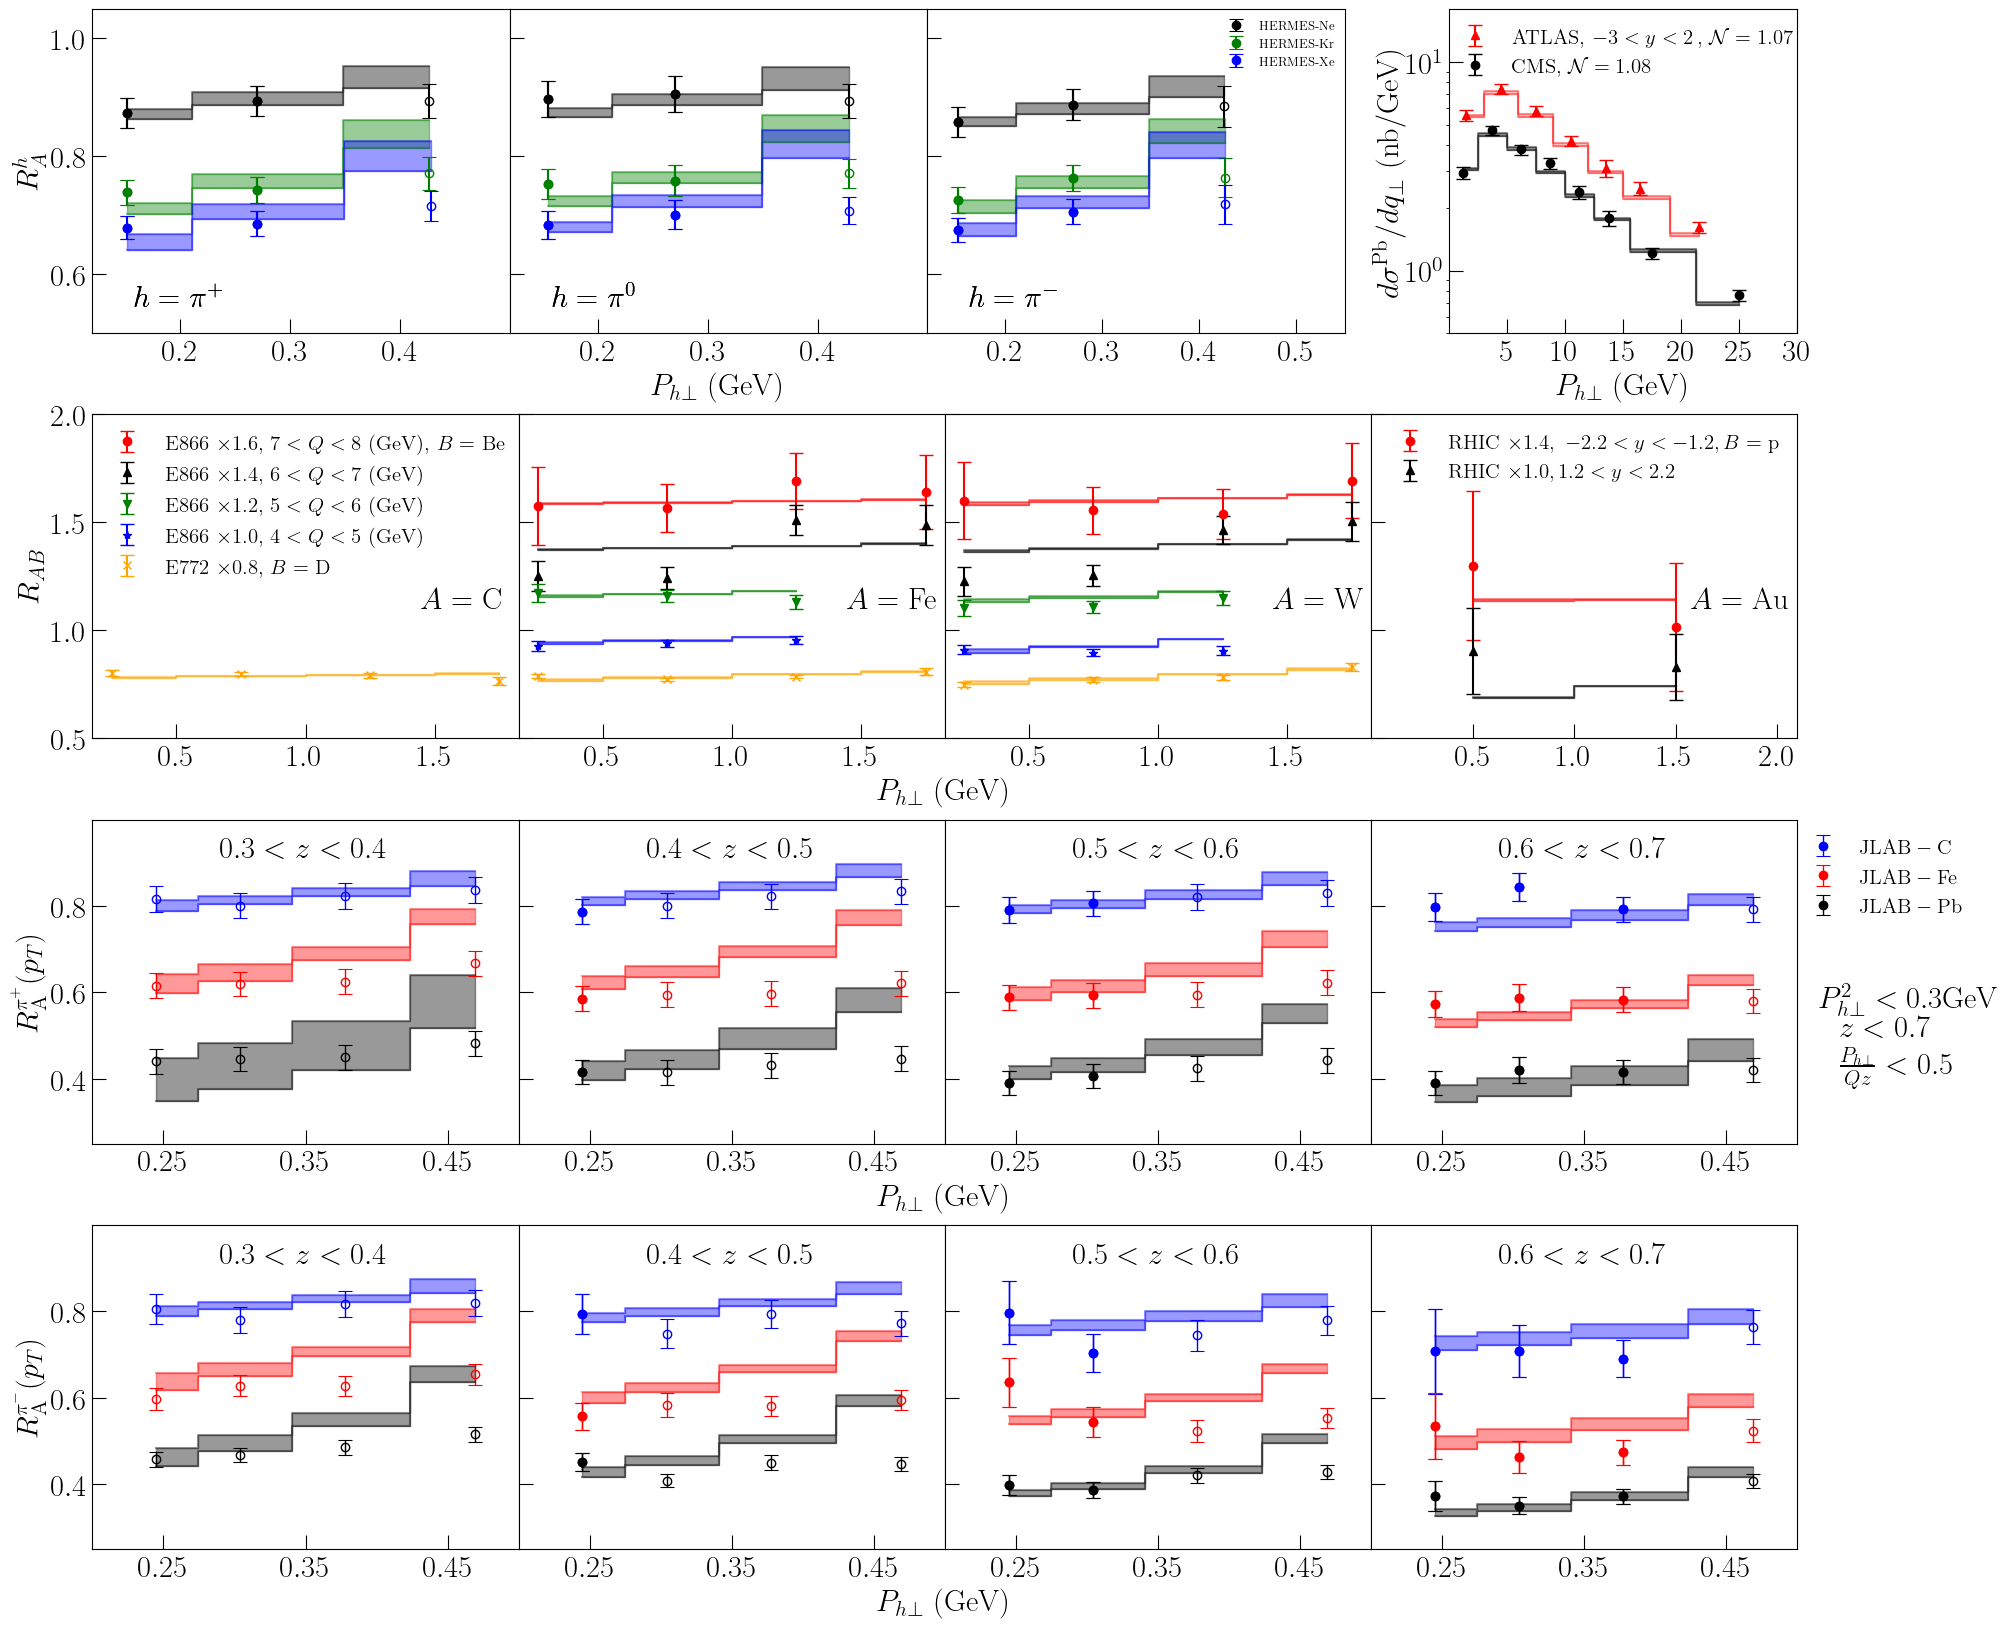

In [18]:
fig = plt.figure()

## Initialization of Figure
nrows = 4 
ncolumns = 4 
gs = gridspec.GridSpec(nrows, ncolumns, figure = fig, hspace = 0.25, wspace =0.3)


## Row 1 
## Subplot 1 : SIDIS Data
gs00 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[0:3], wspace=0)
ax00 = plt.subplot(gs00[0])
ax01 = plt.subplot(gs00[1])
ax02 = plt.subplot(gs00[2])

## Subplot 2 :  LHC Data
ax03 = plt.subplot(gs[3])

## Subplot 3 : Drell Yan Data
gs01 = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=gs[4:8], wspace=0)
ax10 = plt.subplot(gs01[0])
ax11 = plt.subplot(gs01[1])
ax12 = plt.subplot(gs01[2])
ax13 = plt.subplot(gs01[3])

#if FULLPLOT == 1:    
sizeOfFont = 22
collinear = 0
pt2 = 1
    
    ### ROW 1 : HERMES (SIDIS)

    #HERMES(ax00, 'pip_he', 'red', 0, 'pt2', r'\rm He',"o")
HERMES_data()

HERMES_plot(ax00, 'pip_ne', 'black', 0, 'pt2', r'\rm Ne',"^")
HERMES_plot(ax00, 'pip_kr', 'green', 0, 'pt2', r'\rm Kr',"v")
HERMES_plot(ax00, 'pip_xe', 'blue', 0, 'pt2', r'\rm Xe',"*")
    

    #HERMES(ax02, 'pim_he', 'red', 0, 'pt2', r'\rm He',"o")
HERMES_plot(ax02, 'pim_ne', 'black', 0, 'pt2', r'\rm Ne',"^")
HERMES_plot(ax02, 'pim_kr', 'green', 0, 'pt2', r'\rm Kr',"v")
HERMES_plot(ax02, 'pim_xe', 'blue', 0, 'pt2', r'\rm Xe',"*")
                
    #HERMES(ax01, 'pi0_he', 'red', 0, 'pt2', r'\rm $A = $ He',"o")
HERMES_plot(ax01, 'pi0_ne', 'black', 0, 'pt2', r'\rm $A = $ Ne',"^")
HERMES_plot(ax01, 'pi0_kr', 'green', 0, 'pt2', r'\rm $A = $ Kr',"v")
HERMES_plot(ax01, 'pi0_xe', 'blue', 0, 'pt2', r'\rm $A = $ Xe',"*")
  
    
    ## LHC DATA
    
    #ATLAS (5 TeV)
    #ATLAS5(ax03,"ATLAS5_Y3.dat",'red', r"\rm $0<y<2$, $\mathcal{N} = 1.05$","o")
    #ATLAS5(ax03,"ATLAS5_Y2.dat",'black', r"\rm ATLAS $(\times 1/3)$,  $\mathcal{N} = 1.09$","^")
if ATLAS == 1:
    ATLAS5_plot(ax03,"ATLAS5_Y1.dat",'red', r"\rm ATLAS, $-3<y<2\,$,  $\mathcal{N} = 1.07$","^")
    
    #CMS
if CMS5 == 1:
    CMS5_plot(ax03, "CMS5.dat",'black', r"\rm CMS, $\mathcal{N} = 1.08$","o")

    
    ##ROW 2: DY DATA
    #E866\
if E866 == 1:
    E866_plot(ax11, 'E866_800_Qbin_FeBe.dat', 'red', r'\rm E866 $\times 1.6$, $7 < Q < 8$ (GeV), $B =$ Be', factor=1.6,bin=4,ffmt="o")
    E866_plot(ax11, 'E866_800_Qbin_FeBe.dat', 'black', r'\rm E866 $\times 1.4$, $6 < Q < 7$ (GeV)', factor=1.4,bin=3,ffmt="^")
    E866_plot(ax11, 'E866_800_Qbin_FeBe.dat', 'green', r'\rm E866 $\times 1.2$, $5 < Q < 6$ (GeV)', factor=1.2,bin=2,ffmt="v")
    E866_plot(ax11, 'E866_800_Qbin_FeBe.dat', 'blue', r'\rm E866 $\times 1.0$, $4 < Q < 5$ (GeV)', factor=1.0,bin=1,ffmt="*")
        
    E866_plot(ax12, 'E866_800_Qbin_WBe.dat', 'red',       "", factor=1.6,bin=4,ffmt="o")
    E866_plot(ax12, 'E866_800_Qbin_WBe.dat', 'black',      "", factor=1.4,bin=3,ffmt="^")
    E866_plot(ax12, 'E866_800_Qbin_WBe.dat', 'green',       "", factor=1.2,bin=2,ffmt="v")
    E866_plot(ax12, 'E866_800_Qbin_WBe.dat', 'blue', "",factor=1.0,bin=1,ffmt="*")
    
    #E772
if E772 == 1:
    E772_plot(ax10, 'E772_800_CD1.dat', 'orange', "","x", factor = 0.8)
    E772_plot(ax11, 'E772_800_FeD1.dat', 'orange', r"\rm E772 $\times 0.8$, $ B =$ D","x", factor = 0.8)
    E772_plot(ax12, 'E772_800_WD1.dat', 'orange', "","x", factor = 0.8)
        
    #RHIC
if RHIC == 1:
    RHIC_plot(ax13, "RHIC_Ratio_pAu1.dat", "red", r'\rm RHIC $\times 1.4, \ -2.2 < y < -1.2, B =$ p', factor = 1.3,ffmt="o")
    RHIC_plot(ax13, "RHIC_Ratio_pAu2.dat", "black",  r'\rm RHIC  $\times 1.0, 1.2 < y < 2.2$', factor = 1,ffmt="^")

## Row 3 
gs02 = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=gs[8:12], wspace=0)
ax20 = plt.subplot(gs02[0])
ax21 = plt.subplot(gs02[1])
ax22 = plt.subplot(gs02[2])
ax23 = plt.subplot(gs02[3])

#axes, filename, clr, row,z,lbl,ffmt
JLAB2022_PIP_data(ax20, 0)
JLAB2022_PIP_data(ax21, 1)
JLAB2022_PIP_data(ax22, 2)
JLAB2022_PIP_data(ax23, 3)
JLAB2022_PIP_plot(ax20, 'pi+C_pre1.dat', 'blue', 2, 0, r'\rm  C',"*")
JLAB2022_PIP_plot(ax21, 'pi+C_pre1.dat', 'blue', 2, 1, r'\rm  C',"*")
JLAB2022_PIP_plot(ax22, 'pi+C_pre1.dat', 'blue', 2, 2, r'\rm  C',"*")
JLAB2022_PIP_plot(ax23, 'pi+C_pre1.dat', 'blue', 2, 3, r'\rm  C',"*")
JLAB2022_PIP_plot(ax20, 'pi+Fe_pre1.dat', 'red', 2, 0, r'\rm  Fe',"*")
JLAB2022_PIP_plot(ax21, 'pi+Fe_pre1.dat', 'red', 2, 1, r'\rm  Fe',"*")
JLAB2022_PIP_plot(ax22, 'pi+Fe_pre1.dat', 'red', 2, 2, r'\rm  Fe',"*")
JLAB2022_PIP_plot(ax23, 'pi+Fe_pre1.dat', 'red', 2, 3, r'\rm  Fe',"*")
JLAB2022_PIP_plot(ax20, 'pi+Pb_pre1.dat', 'black', 2, 0, r'\rm  Pb',"*")
JLAB2022_PIP_plot(ax21, 'pi+Pb_pre1.dat', 'black', 2, 1, r'\rm  Pb',"*")
JLAB2022_PIP_plot(ax22, 'pi+Pb_pre1.dat', 'black', 2, 2, r'\rm  Pb',"*")
JLAB2022_PIP_plot(ax23, 'pi+Pb_pre1.dat', 'black', 2, 3, r'\rm  Pb',"*")

## Row 4 
gs03 = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=gs[12:16], wspace=0)
ax30 = plt.subplot(gs03[0])
ax31 = plt.subplot(gs03[1])
ax32 = plt.subplot(gs03[2])
ax33 = plt.subplot(gs03[3])

JLAB2022_PIM_data(ax30, 0)
JLAB2022_PIM_data(ax31, 1)
JLAB2022_PIM_data(ax32, 2)
JLAB2022_PIM_data(ax33, 3)
JLAB2022_PIM_plot(ax30, 'pi-C_pre1.dat', 'blue', 3, 0, r'\rm  C',"*")
JLAB2022_PIM_plot(ax31, 'pi-C_pre1.dat', 'blue', 3, 1, r'\rm  C',"*")
JLAB2022_PIM_plot(ax32, 'pi-C_pre1.dat', 'blue', 3, 2, r'\rm  C',"*")
JLAB2022_PIM_plot(ax33, 'pi-C_pre1.dat', 'blue', 3, 3, r'\rm  C',"*")
JLAB2022_PIM_plot(ax30, 'pi-Fe_pre1.dat', 'red', 3, 0, r'\rm  Fe',"*")
JLAB2022_PIM_plot(ax31, 'pi-Fe_pre1.dat', 'red', 3, 1, r'\rm  Fe',"*")
JLAB2022_PIM_plot(ax32, 'pi-Fe_pre1.dat', 'red', 3, 2, r'\rm  Fe',"*")
JLAB2022_PIM_plot(ax33, 'pi-Fe_pre1.dat', 'red', 3, 3, r'\rm  Fe',"*")
JLAB2022_PIM_plot(ax30, 'pi-Pb_pre1.dat', 'black', 3, 0, r'\rm  Pb',"*")
JLAB2022_PIM_plot(ax31, 'pi-Pb_pre1.dat', 'black', 3, 1, r'\rm  Pb',"*")
JLAB2022_PIM_plot(ax32, 'pi-Pb_pre1.dat', 'black', 3, 2, r'\rm  Pb',"*")
JLAB2022_PIM_plot(ax33, 'pi-Pb_pre1.dat', 'black', 3, 3, r'\rm  Pb',"*")

    
#Axis Labels
ax00.set_ylabel(r"\rm $R^h_A$", fontsize = sizeOfFont)
ax10.set_ylabel(r"\rm $R_{AB}$", fontsize = sizeOfFont)
ax20.set_ylabel(r"\rm $R_\mathrm{A}^{\pi^+}(p_{T})$", fontsize = sizeOfFont)
ax30.set_ylabel(r"\rm $R_\mathrm{A}^{\pi^-}(p_{T})$", fontsize = sizeOfFont)
    
#if(pt2==1):
ax01.set_xlabel(r'\rm $P_{h\perp}$ (GeV)',fontsize=sizeOfFont)
#else:
    #ax01.set_xlabel(r'\rm $z$',fontsize=sizeOfFont, x=0.)
    #ax02.set_xlabel(r'\rm $z$',fontsize=sizeOfFont)


ax12.set_xlabel(r'\rm $P_{h\perp}$ (GeV)',fontsize=sizeOfFont, x = 0.)
ax03.set_ylabel(r'\rm $d\sigma^{\rm Pb}/d q_\perp$ (nb/GeV)',fontsize=sizeOfFont, x= 1.,labelpad=-0.1)
ax03.set_xlabel(r'\rm $P_{h\perp}$ (GeV)',fontsize=sizeOfFont)
ax22.set_xlabel(r'\rm $P_{h\perp}$ (GeV)',fontsize=sizeOfFont, x = 0.)
ax32.set_xlabel(r'\rm $P_{h\perp}$ (GeV)',fontsize=sizeOfFont, x = 0.)

    
# Ticks
ax00.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax01.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax02.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax03.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax10.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax11.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax12.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax13.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax20.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax21.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax22.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax23.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax30.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax31.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax32.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax33.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
    
ax01.set_yticklabels([])
ax02.set_yticklabels([])
ax11.set_yticklabels([])
ax12.set_yticklabels([])
ax13.set_yticklabels([])
ax21.set_yticklabels([])
ax22.set_yticklabels([])
ax23.set_yticklabels([])
ax31.set_yticklabels([])
ax32.set_yticklabels([])
ax33.set_yticklabels([])
        
#text
    
props = dict(boxstyle='round', facecolor='white', alpha=0)

ax00.text(0.1, 0.15,  r"\rm $ h = \pi^+$", transform=ax00.transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)


ax01.text(0.1, 0.15,  r"\rm $ h = \pi^0$", transform=ax01.transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)
    
    
ax02.text(0.1, 0.15,  r"\rm $ h = \pi^-$", transform=ax02.transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)
    
    
#if(pt2 ==1):
ax00.text(0.1, 0.15,  r"\rm $ h = \pi^+$", transform=ax00.transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)


ax01.text(0.1, 0.15,  r"\rm $ h = \pi^0$", transform=ax01.transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)
    
    
ax02.text(0.1, 0.15,  r"\rm $ h = \pi^-$", transform=ax02.transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)
#else:
    #ax00.text(0.1, 0.15,  r"\rm $ h = \pi^+$", transform=ax00.transAxes, fontsize=sizeOfFont,
    #verticalalignment='top', bbox=props)


    #ax02.text(0.1, 0.15,  r"\rm $ h = \pi^0$", transform=ax01.transAxes, fontsize=sizeOfFont,
    #verticalalignment='top', bbox=props)
    
    
    #ax01.text(0.1, 0.15,  r"\rm $ h = \pi^-$", transform=ax02.transAxes, fontsize=sizeOfFont,
    #verticalalignment='top', bbox=props)
        
        
    #ax02.text(0.1, 0.95,  r"\rm Prediction.", transform=ax02.transAxes, fontsize=sizeOfFont,
    #verticalalignment='top', bbox=props)
    
    
ax10.text(0.77, 0.47,  r"\rm $A$ = C", transform=ax10.transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)

ax11.text(0.77, 0.47,  r"\rm $A$ = Fe", transform=ax11.transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)

ax12.text(0.77, 0.47,  r"\rm $A$ = W", transform=ax12.transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)
    
ax13.text(0.75, 0.47,  r"\rm $A$ = Au", transform=ax13.transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)
    
props = dict(boxstyle='round', facecolor='gray', alpha=0)
ax20.text(0.3, 0.95, r"\rm $0.3<z<0.4$ ",transform=ax20.transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)
ax21.text(0.3, 0.95, r"\rm $0.4<z<0.5$ ",transform=ax21.transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props) 
ax22.text(0.3, 0.95, r"\rm $0.5<z<0.6$ ",transform=ax22.transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)
ax23.text(0.3, 0.95, r"\rm $0.6<z<0.7$ ",transform=ax23.transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)
ax23.text(1.05, 0.5, r"\rm $P_{h\perp}^2<0.3\mathrm{GeV}$ ",transform=ax23.transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)
ax23.text(1.1, 0.4, r"\rm $z<0.7$ ",transform=ax23.transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)
ax23.text(1.1, 0.3, r"\rm $\frac{P_{h\perp}}{Qz}<0.5$ ",transform=ax23.transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)

props = dict(boxstyle='round', facecolor='gray', alpha=0)
ax30.text(0.3, 0.95, r"\rm $0.3<z<0.4$ ",transform=ax30.transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)
ax31.text(0.3, 0.95, r"\rm $0.4<z<0.5$ ",transform=ax31.transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props) 
ax32.text(0.3, 0.95, r"\rm $0.5<z<0.6$ ",transform=ax32.transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)
ax33.text(0.3, 0.95, r"\rm $0.6<z<0.7$ ",transform=ax33.transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)

    ## Plot limits 
    #ylim
    #HERMES    
ax00.set_ylim(0.5,1.05)
ax01.set_ylim(0.5,1.05)
ax02.set_ylim(0.5,1.05)
    
    
    
#if(pt2==1):
ax00.set_xlim(0.12,0.50)
ax01.set_xlim(0.12,0.50)
ax02.set_xlim(0.12,0.55)
#else:
    #ax00.set_xlim(0.12,0.67)
    #ax01.set_xlim(0.12,0.67)
    #ax02.set_xlim(0.12,0.67)
    
#LHC
ax03.set_ylim(0.5,18)

    
#DY
ax10.set_ylim(0.5,2.0)
ax11.set_ylim(0.5,2.0)
ax12.set_ylim(0.5,2.0)
ax13.set_ylim(0.5,2.0)

ax13.set_xlim(0,2.1)
    
#JLAB2022
ax20.set_ylim(0.25,1)
ax30.set_ylim(0.25,1)
ax21.set_ylim(0.25,1)
ax31.set_ylim(0.25,1)
ax22.set_ylim(0.25,1)
ax32.set_ylim(0.25,1)
ax23.set_ylim(0.25,1)
ax33.set_ylim(0.25,1)

ax20.set_xlim(0.2,0.5)
ax21.set_xlim(0.2,0.5)
ax22.set_xlim(0.2,0.5)
ax23.set_xlim(0.2,0.5)
ax30.set_xlim(0.2,0.5)
ax31.set_xlim(0.2,0.5)
ax32.set_xlim(0.2,0.5)
ax33.set_xlim(0.2,0.5)
    
    
# ticks
ax00.set_xticks([0.2,0.3,0.4])
ax01.set_xticks([0.2,0.3,0.4])
ax02.set_xticks([0.2,0.3,0.4,0.5])
ax03.set_xticks([5,10,15,20,25,30])    
ax13.set_xticks([0.5,1.0,1.5,2.0])

ax20.set_xticks([0.25,0.35,0.45])
ax21.set_xticks([0.25,0.35,0.45])
ax22.set_xticks([0.25,0.35,0.45])
ax23.set_xticks([0.25,0.35,0.45])
ax30.set_xticks([0.25,0.35,0.45])
ax31.set_xticks([0.25,0.35,0.45])
ax32.set_xticks([0.25,0.35,0.45])
ax33.set_xticks([0.25,0.35,0.45])
ax20.set_yticks([0.4,0.6,0.8])
ax30.set_yticks([0.4,0.6,0.8])
ax31.set_yticks([0.4,0.6,0.8])
ax21.set_yticks([0.4,0.6,0.8])
ax32.set_yticks([0.4,0.6,0.8])
ax22.set_yticks([0.4,0.6,0.8])
ax33.set_yticks([0.4,0.6,0.8])
ax23.set_yticks([0.4,0.6,0.8])

#legends
     
ax02.legend(frameon = False,fontsize = sizeOfFont-13,loc=1,ncol = 1,columnspacing = 0.5)
ax03.legend(frameon = False,fontsize = sizeOfFont-7,loc='upper center',ncol = 1,columnspacing = 0.5)
ax11.legend(frameon = False,fontsize = sizeOfFont-7,loc='upper center',ncol = 1,
                   columnspacing = 0.5, bbox_to_anchor=(-0.5, 1.0))
ax13.legend(frameon = False,fontsize = sizeOfFont-7,loc='upper center',ncol = 1,columnspacing = 0.5)
ax23.legend(frameon = False,fontsize = sizeOfFont-7,loc='upper center', bbox_to_anchor=(1.2,1.0))

plt.tight_layout()
fig.set_size_inches(22,20)
fig.savefig('fit_AAKTXZ2023.pdf', bbox_inches = "tight")